<a href="https://colab.research.google.com/github/ykitaguchi77/CorneAI/blob/main/Json_to_CSV_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Jsonファイルを結合してcsvに出力するスクリプト**

#**テスト用データ作成**

In [ ]:
from IPython.core.display import JSON
import os
import json
#サンプルデータセットの作成
data1 = {"pq1":"20220102", "pq2": "hashhashhash", "pq3": "idididid", "pq4": "1", "pq5": "右", "pq6": "●●大", "pq7": "正常", "pq8": ""}
data2 = {"pq1":"20220103", "pq2": "ashhashhashh", "pq3": "didididi", "pq4": "1", "pq5": "左", "pq6": "■■大", "pq7": "翼状片", "pq8": ""}
data3 = {"pq1":"20220108", "pq2": "shhashhashha", "pq3": "didididi", "pq4": "2", "pq5": "左", "pq6": "■■大", "pq7": "正常", "pq8": ""}
data4 = {"pq1":"20220102", "pq2": "hhashhashhas", "pq3": "didididi", "pq4": "3", "pq5": "左", "pq6": "▲▲病院", "pq7": "瘢痕", "pq8": ""}
data5 = {"pq1":"20220105", "pq2": "icecreamicec", "pq3": "iiiidddd", "pq4": "1", "pq5": "右", "pq6": "●●大", "pq7": "正常", "pq8": ""}
data6 = {"pq1":"20220106", "pq2": "pafeitpafeit", "pq3": "ddddiiii", "pq4": "1", "pq5": "左", "pq6": "■■大", "pq7": "翼状片", "pq8": ""}
data7 = {"pq1":"20220109", "pq2": "tiramisutira", "pq3": "idididid", "pq4": "2", "pq5": "左", "pq6": "■■大", "pq7": "正常", "pq8": ""}
data8 = {"pq1":"20220101", "pq2": "pannacottapa", "pq3": "iiddiidd", "pq4": "1", "pq5": "左", "pq6": "▲▲病院", "pq7": "瘢痕", "pq8": ""}


#テストデータをcontentフォルダ内に格納
dir = "/content/json_files"
os.makedirs(dir, exist_ok=True)

with open(dir+"/1.json", 'w') as f:
    json.dump(data1, f, ensure_ascii=False)

with open(dir+"/2.json", 'w') as f:
    json.dump(data2, f, ensure_ascii=False)

with open(dir+"/3.json", 'w') as f:
    json.dump(data3, f, ensure_ascii=False)

with open(dir+"/4.json", 'w') as f:
    json.dump(data4, f, ensure_ascii=False)

with open(dir+"/5.json", 'w') as f:
    json.dump(data5, f, ensure_ascii=False)

with open(dir+"/6.json", 'w') as f:
    json.dump(data6, f, ensure_ascii=False)

with open(dir+"/7.json", 'w') as f:
    json.dump(data7, f, ensure_ascii=False)

with open(dir+"/8.json", 'w') as f:
    json.dump(data8, f, ensure_ascii=False)


with open("/content/json_files/1.json") as f:
    json1 = json.load(f)

with open("/content/json_files/2.json") as f:
    json2 = json.load(f)

with open("/content/json_files/3.json") as f:
    json3 = json.load(f)

with open("/content/json_files/4.json") as f:
    json4 = json.load(f)

with open("/content/json_files/5.json") as f:
    json5 = json.load(f)

with open("/content/json_files/6.json") as f:
    json6 = json.load(f)

with open("/content/json_files/7.json") as f:
    json7 = json.load(f)

with open("/content/json_files/8.json") as f:
    json8 = json.load(f)

#contentフォルダ内のjsonファイルを読み込み
print("サンプルデータ")
print(json1)
print(json2)
print(json3)
print(json4)
print(json5)
print(json6)
print(json7)
print(json8)

#**Jsonファイルを結合してCSVに出力**

下記①のスクリプトを実行すると、contentフォルダ内に"json-files"というフォルダが作成されます。（表示されなければフォルダのアイコンをクリックして下さい）
contentフォルダ内にjsonファイルをドラッグ&ドロップ（アップロードされます） <br>
②のスクリプトを実行すると、contentフォルダ内に症例リストが"施設名.csv"として出力されますので、ダウンロードして下さい。（表示されなければフォルダのアイコンをクリック）<br>
<br>
<br>

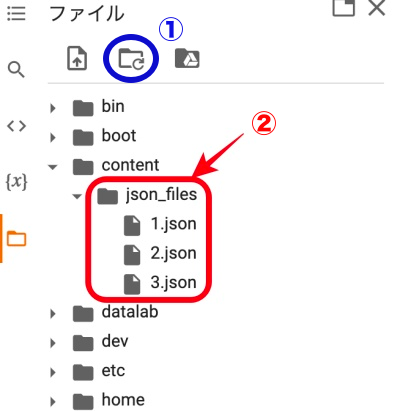


**①Json_filesフォルダを作成**

In [ ]:
import json
import codecs
import os
import pandas as pd
from pandas import json_normalize
import glob
import shutil

dir = "/content/json_files"
os.makedirs(dir, exist_ok=True)

**②Jsonファイルを結合してCSVに出力**

In [ ]:
#②jsonファイルを開いて結合
json_dir = "/content/json_files"
json_list = glob.glob(json_dir+"/*")  #json_dir内のファイルリスト

#空のデータフレームを作成
#pq1:date, pq2: HashID, pq3: ID, pq4: imageNum, pq5: side, pq6: hospital, pq7: disease, pq8: free
df = pd.DataFrame(columns=['pq1', 'pq2', 'pq3', 'pq4', 'pq5', 'pq6', 'pq7', 'pq8'])

for idx, jsonpath in enumerate(json_list):
    with open(jsonpath) as f:
        jsondata = json.load(f) #Jsonファイルを開く
    df.loc[idx, :] = jsondata     #データフレームに追加

df = df.set_axis(df["pq2"].tolist(), axis=0)  #pq2(HashID)をインデックスに
df = df.drop(["pq2"], axis = 1)      #不要な列を削除
df.columns = ["date", "id", "imageNum", "side", "hospital", "disease", "comment"] #項目名をリネーム
df

,date,id,imageNum,side,hospital,disease,comment
hashhashhash,20220102,idididid,1,右,●●大,正常,
hhashhashhas,20220102,didididi,3,左,▲▲病院,瘢痕,
shhashhashha,20220108,didididi,2,左,■■大,正常,
ashhashhashh,20220103,didididi,1,左,■■大,翼状片,
pafeitpafeit,20220106,ddddiiii,1,左,■■大,翼状片,
tiramisutira,20220109,idididid,2,左,■■大,正常,
pannacottapa,20220101,iiddiidd,1,左,▲▲病院,瘢痕,
icecreamicec,20220105,iiiidddd,1,右,●●大,正常,


**③スリット写真用idの追加**

In [ ]:
#@title 施設名の略称(アルファベット）を入力し、左の実行ボタンを押して下さい（例：Osaka） { run: "auto", form-width: "90%", display-mode: "form" }

abr = "" #@param {type:"string"}

if abr == "":
    print("略称を入力して下さい")
else:
    print("略称: ", abr)

略称を入力して下さい


In [ ]:
df = df.sort_values("date")
df = df.sort_values("imageNum")
df = df.sort_values("id")

slit_id = []
slit_num = []
k=0
for i in df["id"]:
    #print(i)
    if i not in slit_num:
        k+=1
    else:
        pass
    slit_num.append(i)
    slit_id.append(abr+"_"+str(k).zfill(3))

#print(slit_num)
#print(slit_id)

try:
    df.insert(loc = 2, column= 'slit_id', value= slit_id)
    print("slit_idの行が作成されました。")
except:
    print("すでにslit_idの行を作成済です。修正が必要なら②からやり直してください。")
    pass

In [ ]:
#作成されたリストを表示
df

**④CSVファイルとして保存**

In [ ]:
from pandas._libs.tslibs.timedeltas import parse_timedelta_unit
#@title 施設名を入力し、左の実行ボタンを押して下さい（例：大阪大） { run: "auto", form-width: "90%", display-mode: "form" }

hospital = ""#@param {type:"string"}
if hospital == "":
    print("施設名を入力して下さい")
else:
    print("施設名: ", hospital)

施設名を入力して下さい


In [ ]:
if hospital == "":
    print("施設名を入力して下さい")
else:
    df.to_csv('/content/'+hospital+'.csv', encoding='utf_8_sig')  #CSVファイルとして出力

#**既存のjson-filesフォルダを削除してやり直したいときに実行**

In [ ]:
#既存のjson_filesフォルダを削除したいときに実行
if os.path.exists(dir):
    shutil.rmtree(dir)